# Project 2 - Ames housing sales price analysis (Part 1 of 3)

## Problem Statement

Some professionals have been posted to the US Department of Agriculture (USDA) Agricultural Research Service's National Animal Disease Center (NADC).\
These folks (some have families, while some are singles) are interested to know what housing features or attributes they should be looking out for, and what are the trade-offs in costs they should weigh and consider as they go about house-hunting.\
Many housing agents are excited about the sudden influx of business and commissions. You are no different and would like to set yourself apart from the crowd of agents to secure these potential clients.

## Background

Ames is a relatively small city with an area of approximately 72km$^{2}$. Ames is best known as the home of Iowa State University (ISU). In fact, ISU lies at the heart of the city surrounded by all residential neighbourhoods in Ames. The city of Ames has a historic tradition of supporting strong neighborhoods which forms the foundation of a vibrant community.\
For an house hunter, one can be assured of a supportive community regardless of the neighborhood that one chooses to stay in.\
For someone who have daily commutes to the NADC which is situated adjacent to Interstate 35, expect private commute time to be well within 20 minutes even if one stay at the opposite far end of Ames city, in the neighbourhood of CollgCr (College Creek).\
Ames has a humid continental climate with 4 seasons. Summer averages around 30℃ while winter can get to sub-zeros.\
[*reference: wikipedia*](https://en.wikipedia.org/wiki/Ames,_Iowa)\
[*reference: cityofames.org*](https://www.cityofames.org/living/neighborhoods)

![ames_neighborhood](../images/ames_neighborhood_map.jpg)
\([*credits: picture source*](https://rstudio-pubs-static.s3.amazonaws.com/337439_24918eaefe724411be93e41ede48b256.html))

## Import Libraries and Data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNetCV, ElasticNet
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import dataset
ames = pd.read_csv('../datasets/train.csv')

## Data Cleaning and EDA

In [3]:
# preview data
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# start by making all the columns header into lower case and converting space to underscores
ames.columns = ames.columns.str.replace(' ', '_')
ames.columns = ames.columns.str.lower()

In [5]:
# verify that headers have been updated
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# take a look at columns with null values and how many of them
ames_col_w_null = ames.isnull().sum().sort_values(ascending=False)
ames_col_w_null[ames_col_w_null>0]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
dtype: int64

Comments:\
Total rows: 2051\
Top columns with null entries: Pool Quality, Misc Feature (i.e. elevator, tennis court, shed), Type of alley access, Fence quality, Fireplace quality, Lot frontage (i.e. linear feet of street connected to property).\
Will KIV these columns, if they are not useful based on further EDA, then we can simply drop them instead of contemplating how to impute missing data.

In [7]:
# take a look at the datatypes
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

Comments:\
Quite a fair bit of columns are non-numeric. These appear to be categorical in nature. Lets plot them to take a look.

### Histogram plots

In [8]:
# iterating all the categorical histogram plots instead of manually plotting them
# exported into jpg file for preview alongside the notebook
# commenting out for submission as this take awhile to run
# take reference from within the plots folder

# fig, ax = plt.subplots(47, figsize=(10,235))
# count = 0

# for column in ames.columns:
#     if (ames[column].dtype == object) or (column in ['ms_subclass', 'overall_qual', 'overall_cond', 'mo_sold', 'yr_sold']):
#         xs = np.arange(len(ames[column].value_counts().sort_index().index))
#         ys = ames[column].value_counts().sort_index()
#         ax[count].barh(xs, ys, label=column)
#         ax[count].set_yticks(xs)
#         ax[count].set_yticklabels(ames[column].value_counts().sort_index().index)
#         ax[count].set_title(column)
#         ax[count].set_xlabel('value counts')
#         count += 1        

# plt.tight_layout()
# plt.savefig('../plots/categorical histograms.jpg', bbox_inches='tight')

Comments:\
Histogram plots of all categorical columns.\
Some columns are clearly not that useful, e.g. 'Street - type of road access to property' since virtually all of them are Paved.\
Others like 'Misc Feature - shed, elevator, tennis court' have very little data... such columns could probably be dropped as well, but lets see further.

### Data cleaning - imputing null values as 0 prior to plotting

In [9]:
# further expanding the view on categorical data, to see if any classification can be further applied rather than OHE 
# copy to another dataframe for cleaning while preserving the integrity of original data,
# in case there are better ways to manage NaN values than putting them as 0
# some of these NaN are indeed indicative of 0, e.g. the absence of basement will see basement quality having NaN
# anyway putting them as zero before we plot the categorical boxplots, 
# else NaN columns will be omitted in the botplots
# so with 0 values, it is more complete on total data counts for sub-categories
ames1 = ames.copy()
ames1.fillna(0, inplace=True)
ames1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     2051 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

### Box plots

In [10]:
# commenting out for submission as this takes awhile to run
# see the folder for the jpg output

# fig, ax = plt.subplots(47, figsize=(10,235))
# count = 0

# for column in ames1.columns:
#     if (ames1[column].dtype == object) or (column in ['ms_subclass', 'overall_qual', 'overall_cond', 'mo_sold', 'yr_sold']):

#         sns.boxplot(ax = ax[count], y = column, x = 'saleprice', data=ames1, orient='h')
#         ax[count].set_title(column)
#         ax[count].set_xlabel('sale price')
#         count += 1        

# plt.tight_layout()
# plt.savefig('../plots/categorical boxplots.jpg', bbox_inches='tight')

Comments:\
Plotting all the categorical boxplots as part EDA.\
Intention is to observe relationships and explore possibility to apply ordinal ratings to the categorical columns instead of using OHE, which increases the complexity.\
The thinking on this is to develop simple ordinal ratings and perhaps, creating interaction features to group the categorical columns so as to streamline the number of features used.\
My underlying preference is to achieve a 'simple but good enough' model as opposed to 'an overly complex though highly accurate' model. 'Highly accurate' remains subjective given the limited test data available. This is because we are afterall, modelling based on training dataset. Actual performance on unseen data is more critical.

### First pass data removal

In [11]:
# sort the columns by diversity of data, whether the categorical data is largely dominated by one sub-category
# this code returns the percentage of data belonging to the dominant sub-category that is more than 90%
cat_list = []
max_pct = []
for col in ames1.columns:
    if ames1[col].dtype == object:
        cat_list.append(col)
        max_pct.append(ames1[col].value_counts().max()/2051*100)
df1 = pd.DataFrame(zip(cat_list, max_pct), columns = ['category', 'max_pct'])
df1[df1['max_pct']>90].sort_values('max_pct', ascending=False)

,category,max_pct
5,utilities,99.902487
1,street,99.658703
38,pool_qc,99.561190
10,condition_2,98.732326
14,roof_matl,98.732326
26,heating,98.391029
40,misc_feature,96.830814
7,land_slope,95.221843
31,functional,93.369088
2,alley,93.174061


In [12]:
# drop the above rows of data since they lack diversity
# also drop id and pid columns as they are index/serial numbers that provide no meaningful data analysis
cat_to_drop = df1[df1['max_pct']>90]['category']
ames2 = ames1.drop(columns = cat_to_drop)
ames2.drop(columns = ['id', 'pid'], inplace=True)
ames2.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,0.0,13517,IR1,Lvl,CulDSac,Sawyer,RRAe,1Fam,...,0,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,IR1,Lvl,CulDSac,SawyerW,Norm,1Fam,...,0,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Reg,Lvl,Inside,NAmes,Norm,1Fam,...,0,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Reg,Lvl,Inside,Timber,Norm,1Fam,...,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,IR1,Lvl,Inside,SawyerW,Norm,1Fam,...,0,0,0,0,0,0,3,2010,WD,138500


Comments:\
I have objectively drop these columns since the most of the data (>90%) belong to a single sub-category and are deemed not as informative.\
The cut-off at 90% was assessed as a first-pass screening method to streamline the huge amount of data variables/columns. If the eventual model performance is inadequate, will make it a point to revisit these variables/columns again.\
And for the purpose of that, I have also created a new dataframe to retain integrity of the original data in the event we need to revisit this part and change the drop parameters after further analysis.

### Converting ordinal strings to numeric

In [13]:
# create an numeric ordinal scale for quality attributes such as exter_qual, exter_cond, bsmt_qual, bsmt_cond, heating_qc, 
# kitchen_qual, fireplace_qu, garage_qual
# these already have ordinal scores in string format
rating_dict = {'Ex': 5,
              'Gd': 4,
              'TA': 3,
              'Fa': 2,
              'Po': 1}
for i in ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qu',
          'garage_qual']:
    ames2[i] = ames2[i].map(rating_dict)

In [14]:
# the absence of some of these features might have resulted in null values again in the mapping
ames2.isnull().sum()[ames2.isnull().sum()>0]

bsmt_qual         55
bsmt_cond         55
fireplace_qu    1000
garage_qual      114
dtype: int64

In [15]:
# since in this case null values indicates the absence of the feature, will just fillna with 0
ames2.fillna(0, inplace=True)
# let check that the null values are indeed addressed
ames2.isnull().sum()[ames2.isnull().sum()>0]

Series([], dtype: int64)

Comments:\
I am converting the ordinal rating system from strings to numeric.\
Using numeric rating system allow these features to be modelled through regression.\
Also, I have chosen to impute the missing data with 0 values. This is to represent the absence of the respective attributes in the features, i.e. no garage, no basement, no fireplace.

### Converting non-ordinal categorical data into 2 numerical groups

In [16]:
# taking a look at the saleprice statistics to see how we may wish to apply some form of ordinal ratings to categorical data
ames2['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [17]:
# in line with simplicity philosophy, have decided on a simple 2-point attribute system
# using 1 and 2 to represent the sub-category saleprice mean that is below and above overall saleprice mean
# the decision to attempt this comes from the EDA observation using the boxplots and histograms...
# the thinking behind this is that perhaps some zones are 'less desirable'
# and have sale prices below the average and vice versa
# to illustrate, the mean (and even 75 percentile) sale prices in zones 'A (agr)', 'C (all)', 'I (all)', 'RH', 'RM' 
# are below the mean of sale price (~180k) of all the houses
# therefore, i am classifying these zones as 'below the mean' and given them a rating of 1
# the others that are above the mean, i have given them a rating of 2
ames1.groupby('ms_zoning')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
ms_zoning,,,,,,,,
A (agr),2.0,47300.000000,48366.103833,13100.0,30200.0,47300.0,64400.0,81500.0
C (all),19.0,78010.894737,32781.478897,34900.0,50913.5,75000.0,105388.0,140000.0
FV,101.0,218618.316832,53063.423791,144152.0,176500.0,208900.0,254900.0,370878.0
I (all),1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0
RH,14.0,148859.571429,35970.877401,82000.0,128500.0,152217.0,180000.0,200000.0
RL,1598.0,191235.164581,80380.790716,35000.0,137500.0,172500.0,222375.0,611657.0
RM,316.0,129119.142405,50776.911622,12789.0,103300.0,123900.0,141500.0,475000.0


In [18]:
# per the above idea, i am expanding this 2-point ratings to more categorical data 
# create a two point attribute function to map some categories with the cut-off at 180k (mean sale price)
# in the spirit of experimentation, have also tried using median with a score of 160k
# likewise, have also experimented with a 3-point system as well
# given that the outcomes are largely similar, i.e. R-sq improvement <0.1
# i have decided to keep things simple using a 2-point system
def two_point_att(category):
    category = pd.DataFrame(ames2.groupby(category)['saleprice'].mean())
    dictionary_to_create={}
    for i in category.index:
        if i == 0:
            dictionary_to_create[i] = 0
        else:
            if category.loc[i,'saleprice'] < 180000:
                dictionary_to_create[i] = 1
            else:
                dictionary_to_create[i] = 2
    
    return dictionary_to_create

In [19]:
for i in ['ms_zoning', 'lot_config', 'condition_1', 'lot_shape', 'ms_subclass',
          'bldg_type', 'house_style', 'exterior_1st', 'garage_type', 'garage_finish',
         'bsmt_exposure', 'bsmtfin_type_1']:
    dict_temp = two_point_att(i)
    ames2[i] = ames2[i].map(dict_temp)

In [20]:
# verify the change
ames2.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2,2,0.0,13517,2,Lvl,2,Sawyer,1,2,...,0,0,0,0,0,0,3,2010,WD,130500
1,2,2,43.0,11492,2,Lvl,2,SawyerW,2,2,...,0,0,0,0,0,0,4,2009,WD,220000
2,2,2,68.0,7922,1,Lvl,1,NAmes,2,2,...,0,0,0,0,0,0,1,2010,WD,109000
3,2,2,73.0,9802,1,Lvl,1,Timber,2,2,...,0,0,0,0,0,0,4,2010,WD,174000
4,1,2,82.0,14235,2,Lvl,1,SawyerW,2,2,...,0,0,0,0,0,0,3,2010,WD,138500


Comments:\
What I have done to the above is an attempt to bucket some of the categorical data into groups.\
I have adopted a simple 2-point attribute system to group the data in those categorical columns/features using their means, i.e. data below mean sale price are grouped as 1, data above mean sale price are grouped as 2.\
While this may appear over-simplistic, the intent is not to stop at this step, but generate interaction features for some of these grouped features, thereby expanding its utility.\
In this way, I would then be able to somewhat include the data provided by these categorical features into my model without expressing them individually as dummy variables via one-hot-encoding, thereby reducing the number of features and model complexity.\
At the initial phase, this was merely an experiment and I did not know if it would work.\
Subsequently, I would observe that this method does produce relative good correlation with the target variable even though, not all of these variables/features are eventually used in the model due to a disciplined approach towards model simplication.

### Converting non-ordinal categorical data into 3 numerical groups

In [21]:
# take a look at the statistics for sale price in relation to neighborhood
ames1.groupby('neighborhood')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Blmngtn,22.0,200417.681818,27447.004922,159895.0,180250.00,192250.0,218742.50,264561.0
Blueste,6.0,144566.666667,26089.589239,121000.0,123925.00,137500.0,159625.00,185000.0
BrDale,19.0,103371.052632,11262.318142,85400.0,93750.00,105500.0,111875.00,122500.0
BrkSide,76.0,127022.697368,34825.975741,39300.0,109375.00,128000.0,139975.00,223500.0
ClearCr,27.0,217490.074074,53479.942309,130000.0,177500.00,225000.0,250500.00,328000.0
CollgCr,180.0,202497.216667,54022.918602,110000.0,164740.00,200000.0,225250.00,475000.0
Crawfor,71.0,205901.211268,60856.738509,90350.0,158250.00,199500.0,235250.00,392500.0
Edwards,143.0,130493.468531,51123.818503,35000.0,101000.00,125000.0,142500.00,415000.0
Gilbert,116.0,189228.387931,32434.069509,133000.0,172281.25,180750.0,193625.00,377500.0


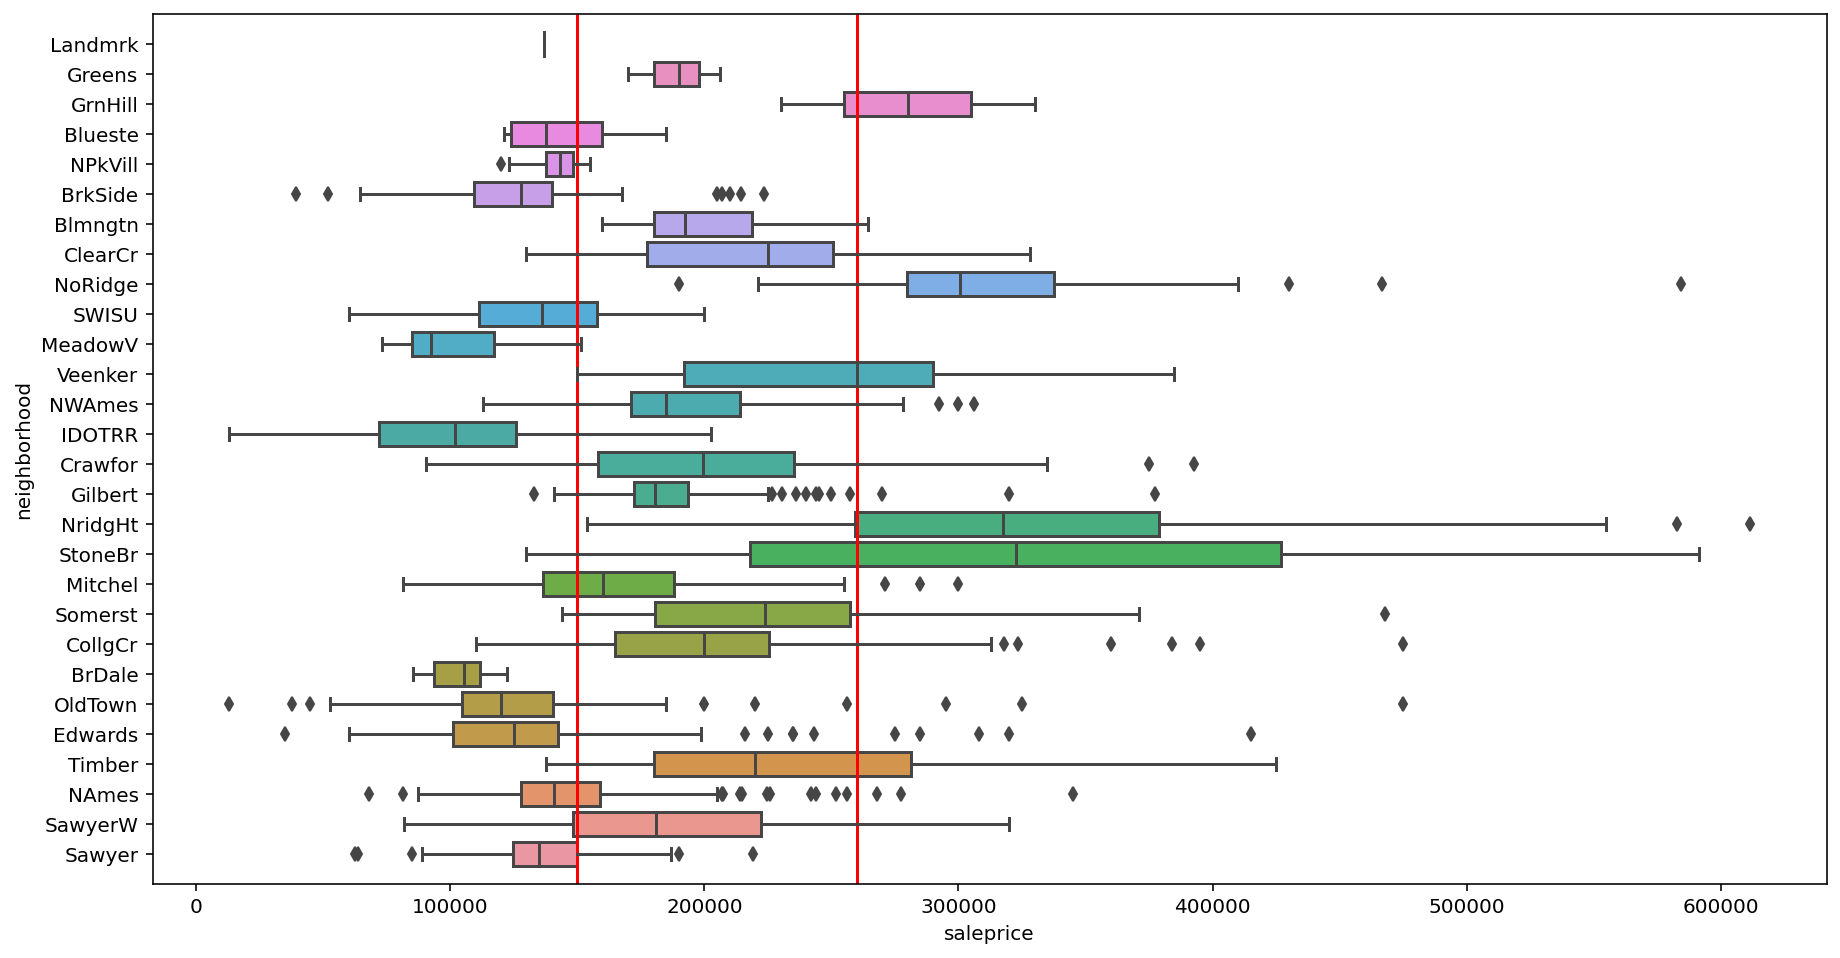

In [22]:
# attempts at bucketing the neighbourhood sale price data into 3 groups
# see comments below for further explanation
plt.figure(figsize=(15,8))
sns.boxplot(y='neighborhood', x='saleprice', data=ames1)
plt.vlines(150000, ymin = -1, ymax=28, color='r')
plt.vlines(260000, ymin = -1, ymax=28, color='r')
plt.ylim(-1,28)
plt.show()

In [23]:
# implementing a three point attribute grouping for neighborhood
# cut-off is determined through inspection of boxplot, approx. <150k, next < 260k, last > 260k sale prices
nbh = pd.DataFrame(ames2.groupby('neighborhood')['saleprice'].median())
neighborhood_dict = {}
for i in nbh.index:    
    if nbh.loc[i,'saleprice'] < 150000:
        neighborhood_dict[i] = 1
    elif nbh.loc[i,'saleprice'] > 260000:
        neighborhood_dict[i] = 3
    else:
        neighborhood_dict[i] = 2
ames2['neighborhood'] = ames2['neighborhood'].map(neighborhood_dict)

Comments:\
Neighbourhood is a different beast as it has 28 sub-categories vs. <10 sub-categories for most of the other categorical features/columns.\
There is also a higher spread of the data, and thus leading me to think about increasing the granularity of the bucketing.\
I have decided to bucket the data into 3 groups, namely low, medium, high sale price groups.\
Why 3? Not 4, 5, 6?\
First is, simplicity.\
Second is, whether I am able to split the data into groups that are sufficiently discrete. By sufficiently discrete, I mean to say whether I am able to ensure majority of the sub-categories data remain within each group that I have dissected with as little overlap as possible into another group.\
The easiest way is by inspection, as I can observed the median lines in the boxplot for reference to know which group each subcategories will fall into since the median signifies the 50th percentile of data, i.e. if I can contain one end of the whiskers and the median line within one group in entirety, it means i have at least 50% of the data bucketed in the particular group.\
Expanding on this thought process, the principle for bucketing is then try to capture as much of each boxplot (especially the 25th to 75th percentile) within a single group.\
Obviously with more number of groups, e.g. 4,5,6, that i create, the higher chance that each boxplot (sub-category) will not be contained in a single group. Hence, the choice of 3 groups satisfy the desire for increased granularity vs. 2 point attribute while not over grouping the data.\
This will subsequently be justified from the correlation and through the adoption of this feature in the model.

### Feature engineering - creating interaction features

In [24]:
# next, feature engineering as mentioned to incorporate multiple categorical features
# combining those attributes into a location and house feature
# attributes such as ms_zoning, lot_config, neighbourhood, condition_1 are associated the physical location
# attributes such as ms_subclass, bldg_type, house_style and exterior_1st are associated with the overall house
# the decision to use addition vs multiplication for this interaction feature is
# made based on the method which gives a higher correlation with sale prices 
ames2['location'] = ames2['ms_zoning'] + ames2['lot_config'] + ames2['neighborhood'] + ames2['condition_1']
ames2['house'] = ames2['ms_subclass'] + ames2['bldg_type'] + ames2['house_style'] + ames2['exterior_1st'] 

In [25]:
# there are quite a few qualities associated with garage, lets try to combine them into a single feature
# the multiplication method for interaction feature is chosen as it has higher correlation with saleprice vs addition
ames2[['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual']]
ames2['garage'] = ames2['garage_type'] * ames2['garage_finish'] * ames2['garage_qual']

In [26]:
# there are quite a few qualities associated with basement, lets try to combine them into a single feature
# the addition method for interaction feature is chosen as it has higher correlation with salepricevs multiplication
ames2[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmt_unf_sf', 'total_bsmt_sf',
      'bsmt_full_bath', 'bsmt_half_bath']]
ames2['basement'] = ames2['bsmt_qual'] + ames2['bsmt_cond'] + ames2['bsmt_exposure'] + ames2['bsmtfin_type_1']

In [27]:
# verify the new columns
ames2.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,...,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice,location,house,garage,basement
0,2,2,0.0,13517,2,Lvl,2,1,1,2,...,0,0,3,2010,WD,130500,6,7,12.0,9.0
1,2,2,43.0,11492,2,Lvl,2,2,2,2,...,0,0,4,2009,WD,220000,8,8,12.0,10.0
2,2,2,68.0,7922,1,Lvl,1,1,2,2,...,0,0,1,2010,WD,109000,6,7,3.0,9.0
3,2,2,73.0,9802,1,Lvl,1,2,2,2,...,0,0,4,2010,WD,174000,7,8,12.0,9.0
4,1,2,82.0,14235,2,Lvl,1,2,2,2,...,0,0,3,2010,WD,138500,7,5,3.0,8.0


Comments:\
As mentioned earlier, the intention for grouping the categorical data is an attempt to avoid the use of one-hot-encoding dummy variables as that increases the number of features and hence model complexity.\
Here, I have generated some interaction features based on some identified commonalities, such as location which encompasses the ms zoning (zone classification), lot configuration, the neighbourhood and the condition 1 (proximity to main road/railroad).\
For house, it is an interaction feature of the related house attributes such as ms subclass (building class), building type (townhouse, detached, etc), house style (one storey, two storey, etc), 1st exterior (exterior covering of the house).\
Likewise for garage and basement, which is an interaction feature of its respective attributes, i.e. quality, type, finish, etc.\
The choice of addition or multiplication to combine the interaction feature is based on the observation of correlation with sale price, where the arithmetic operation with the higher correlation is chosen.

### Feature engineering - creating derived features

In [28]:
# create a house age column, to explore if it may have some correlation with price
ames2['age_at_sale'] = ames2['yr_sold'] - ames2['year_built']
ames2['remod_age_at_sale'] = ames2['yr_sold'] - ames2['year_remod/add']

Comments:\
Creating an age of the house as well as a remodelled age in lieu of their respective years.\
By doing so, this could reduce the order of magnitude of the variables and could help avoid a scaling step?\
Lets see further.

### Feature engineering - normalizing data

In [29]:
# take a look at the sales price distribution
ames2['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

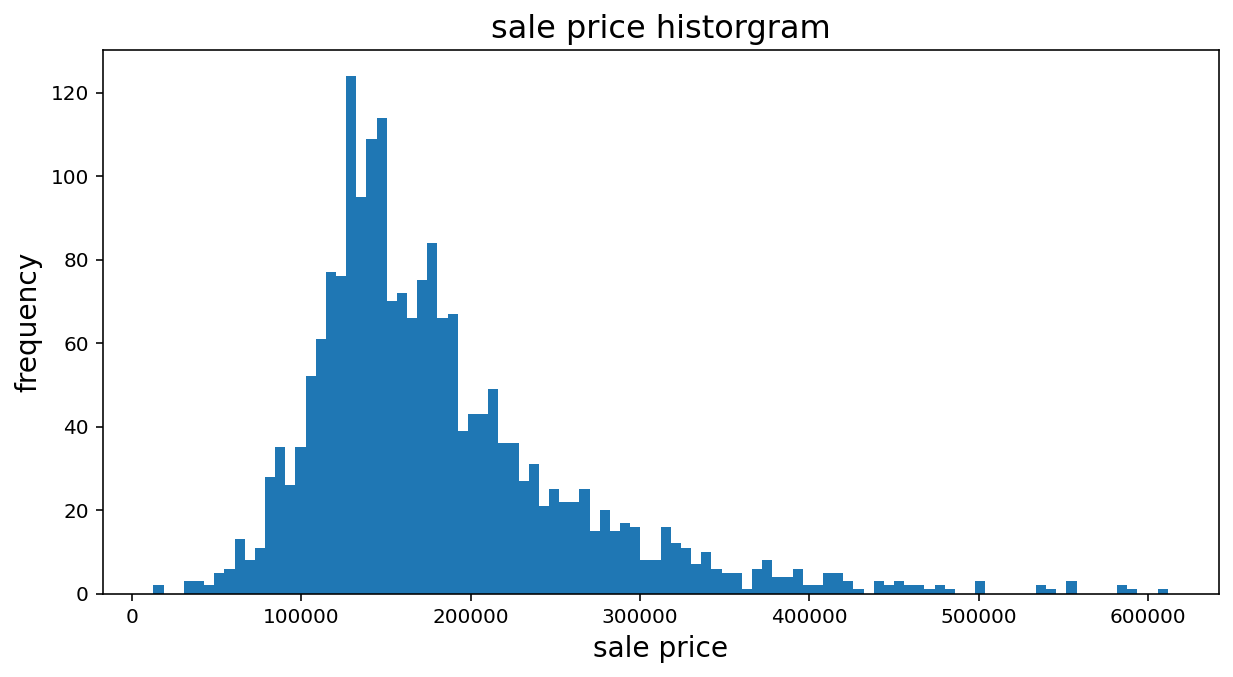

In [30]:
# histogram for salesprice
plt.figure(figsize=(10,5))
plt.hist(ames2['saleprice'], bins=100)
plt.ylabel('frequency', fontsize=14)
plt.xlabel('sale price', fontsize=14)
plt.title('sale price historgram', fontsize = 16)
plt.show()

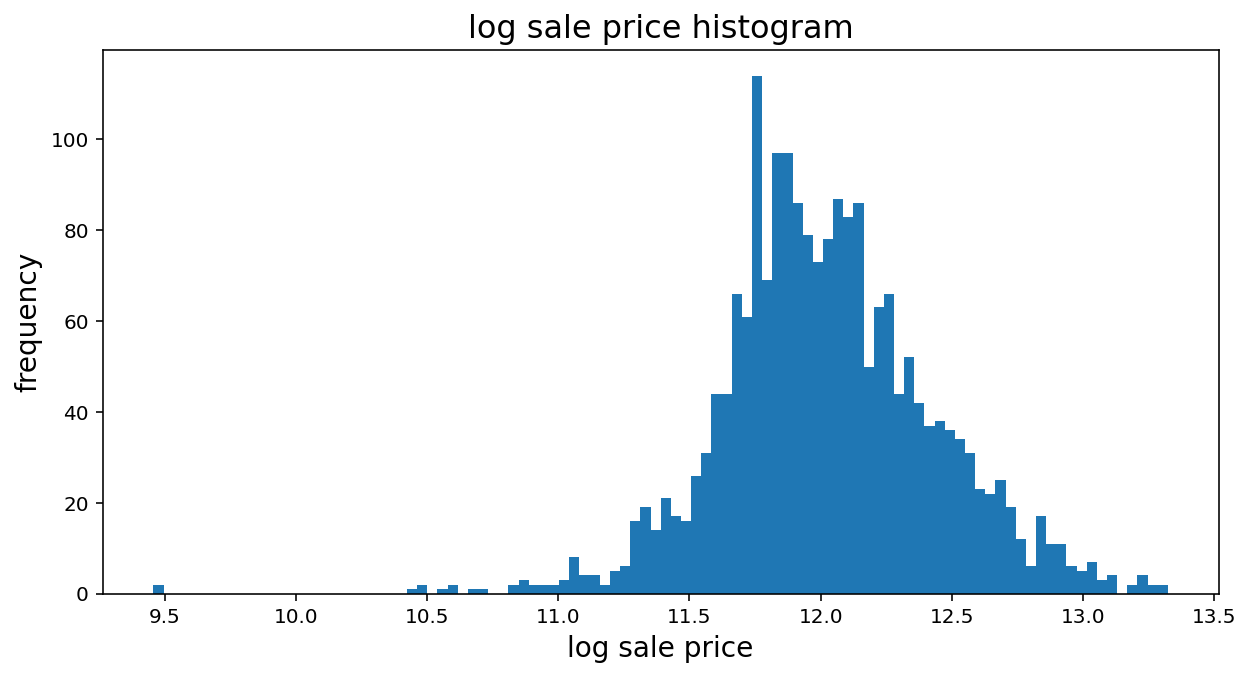

In [31]:
# sales price seem to have a pretty long right tail, apply a log function to it
plt.figure(figsize=(10,5))
ames2['log_saleprice'] = np.log(ames2['saleprice'])
plt.hist(ames2['log_saleprice'], bins=100)
plt.ylabel('frequency', fontsize=14)
plt.xlabel('log sale price', fontsize=14)
plt.title('log sale price histogram', fontsize=16)
plt.show()

In [32]:
# looks like this is much more normal, although there is somewhat of a left tail
# we can address it by removing some of these outliers
ames2['log_saleprice'].describe()

count    2051.000000
mean       12.024397
std         0.411316
min         9.456341
25%        11.773943
50%        11.998433
75%        12.273731
max        13.323927
Name: log_saleprice, dtype: float64

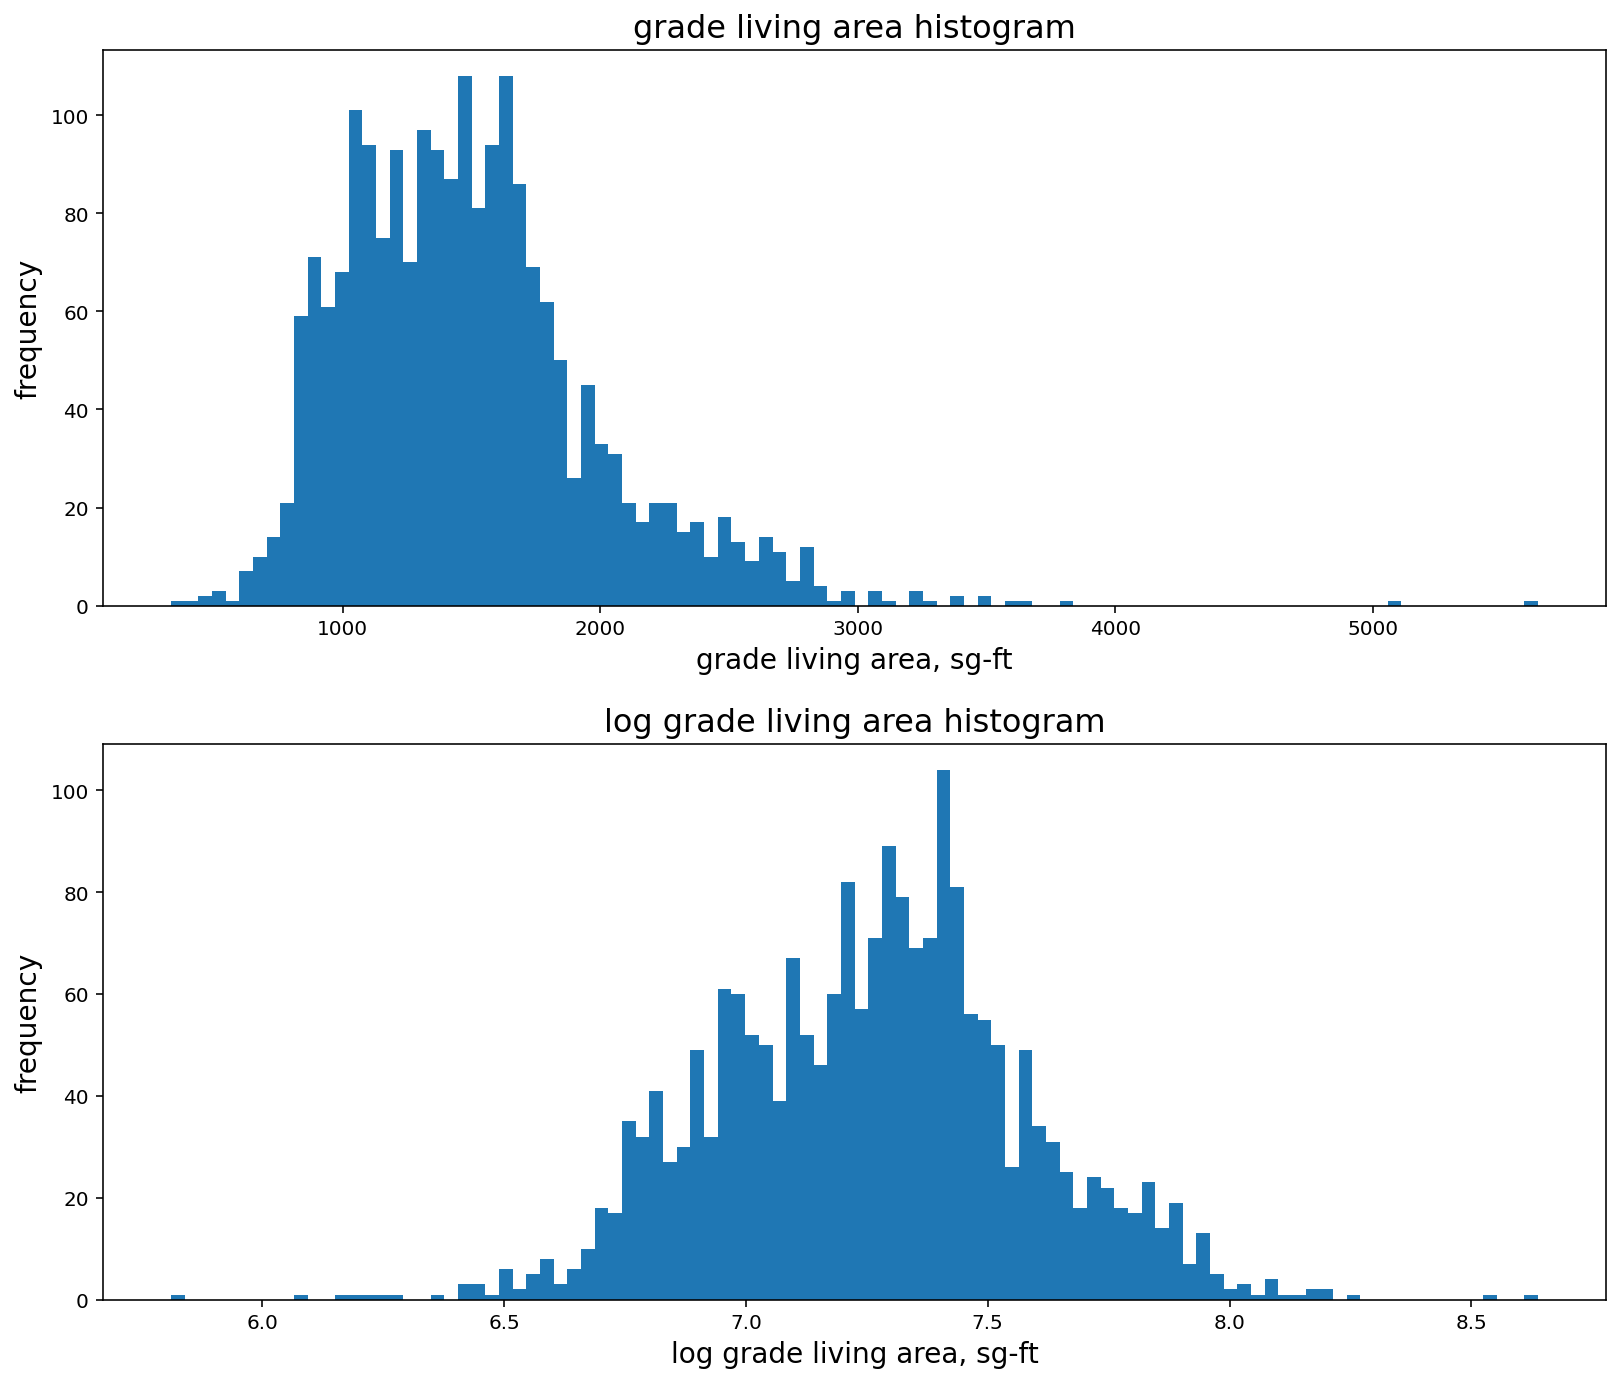

In [33]:
# plotting similar area and log area plots for grade living area feature
fig, ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)
ax[0].hist(ames2['gr_liv_area'], bins=100)
ax[0].set_ylabel('frequency', fontsize=14)
ax[0].set_xlabel('grade living area, sg-ft', fontsize=14)
ax[0].set_title('grade living area histogram', fontsize=16)
fig.tight_layout(pad=3)
ax[1].hist(np.log(ames2['gr_liv_area']), bins=100)
ax[1].set_ylabel('frequency', fontsize=14)
ax[1].set_xlabel('log grade living area, sg-ft', fontsize=14)
ax[1].set_title('log grade living area histogram', fontsize=16)
plt.show()

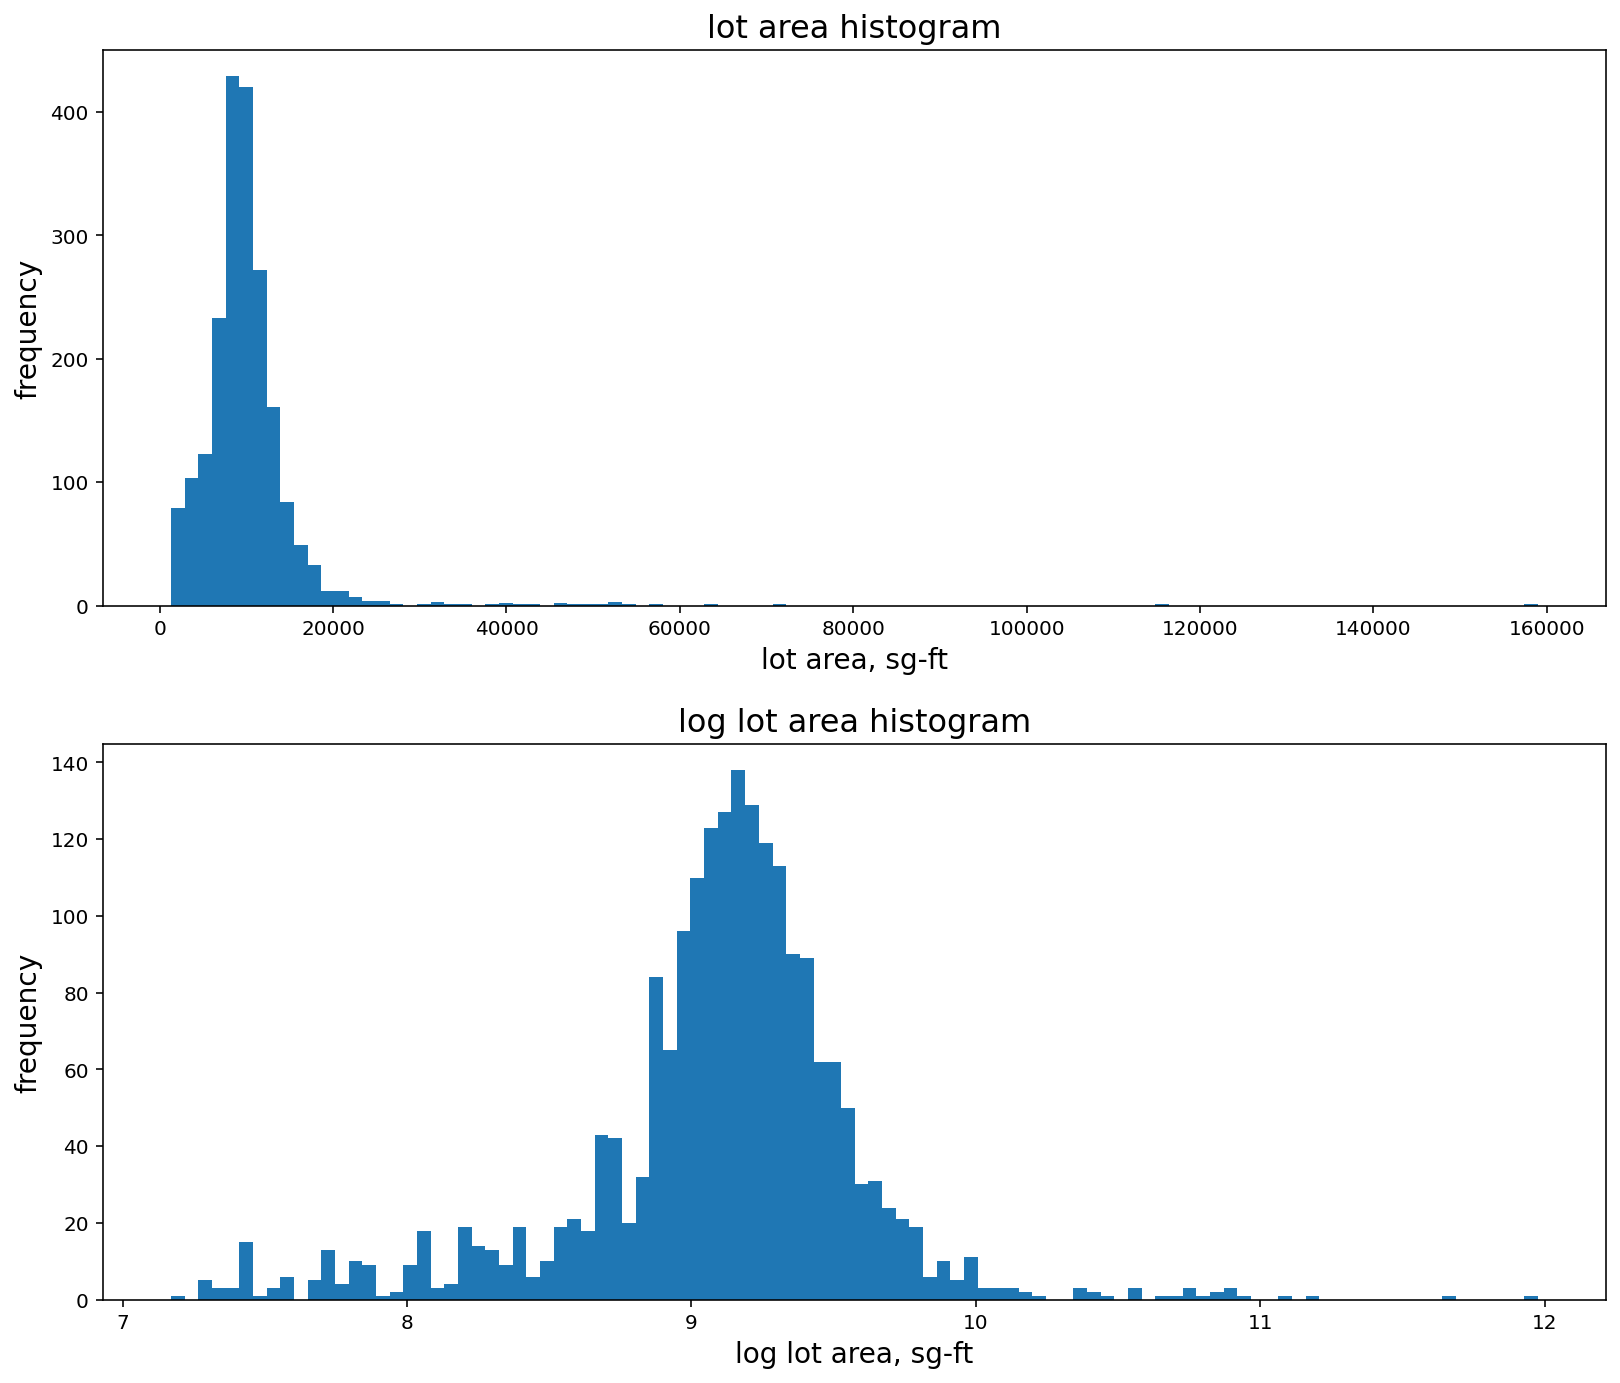

In [34]:
# plotting similar area and log area plots for lot area feature
fig, ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)
ax[0].hist(ames2['lot_area'], bins=100)
ax[0].set_ylabel('frequency', fontsize=14)
ax[0].set_xlabel('lot area, sg-ft', fontsize=14)
ax[0].set_title('lot area histogram', fontsize=16)
fig.tight_layout(pad=3)
ax[1].hist(np.log(ames2['lot_area']), bins=100)
ax[1].set_ylabel('frequency', fontsize=14)
ax[1].set_xlabel('log lot area, sg-ft', fontsize=14)
ax[1].set_title('log lot area histogram', fontsize=16)
plt.show()

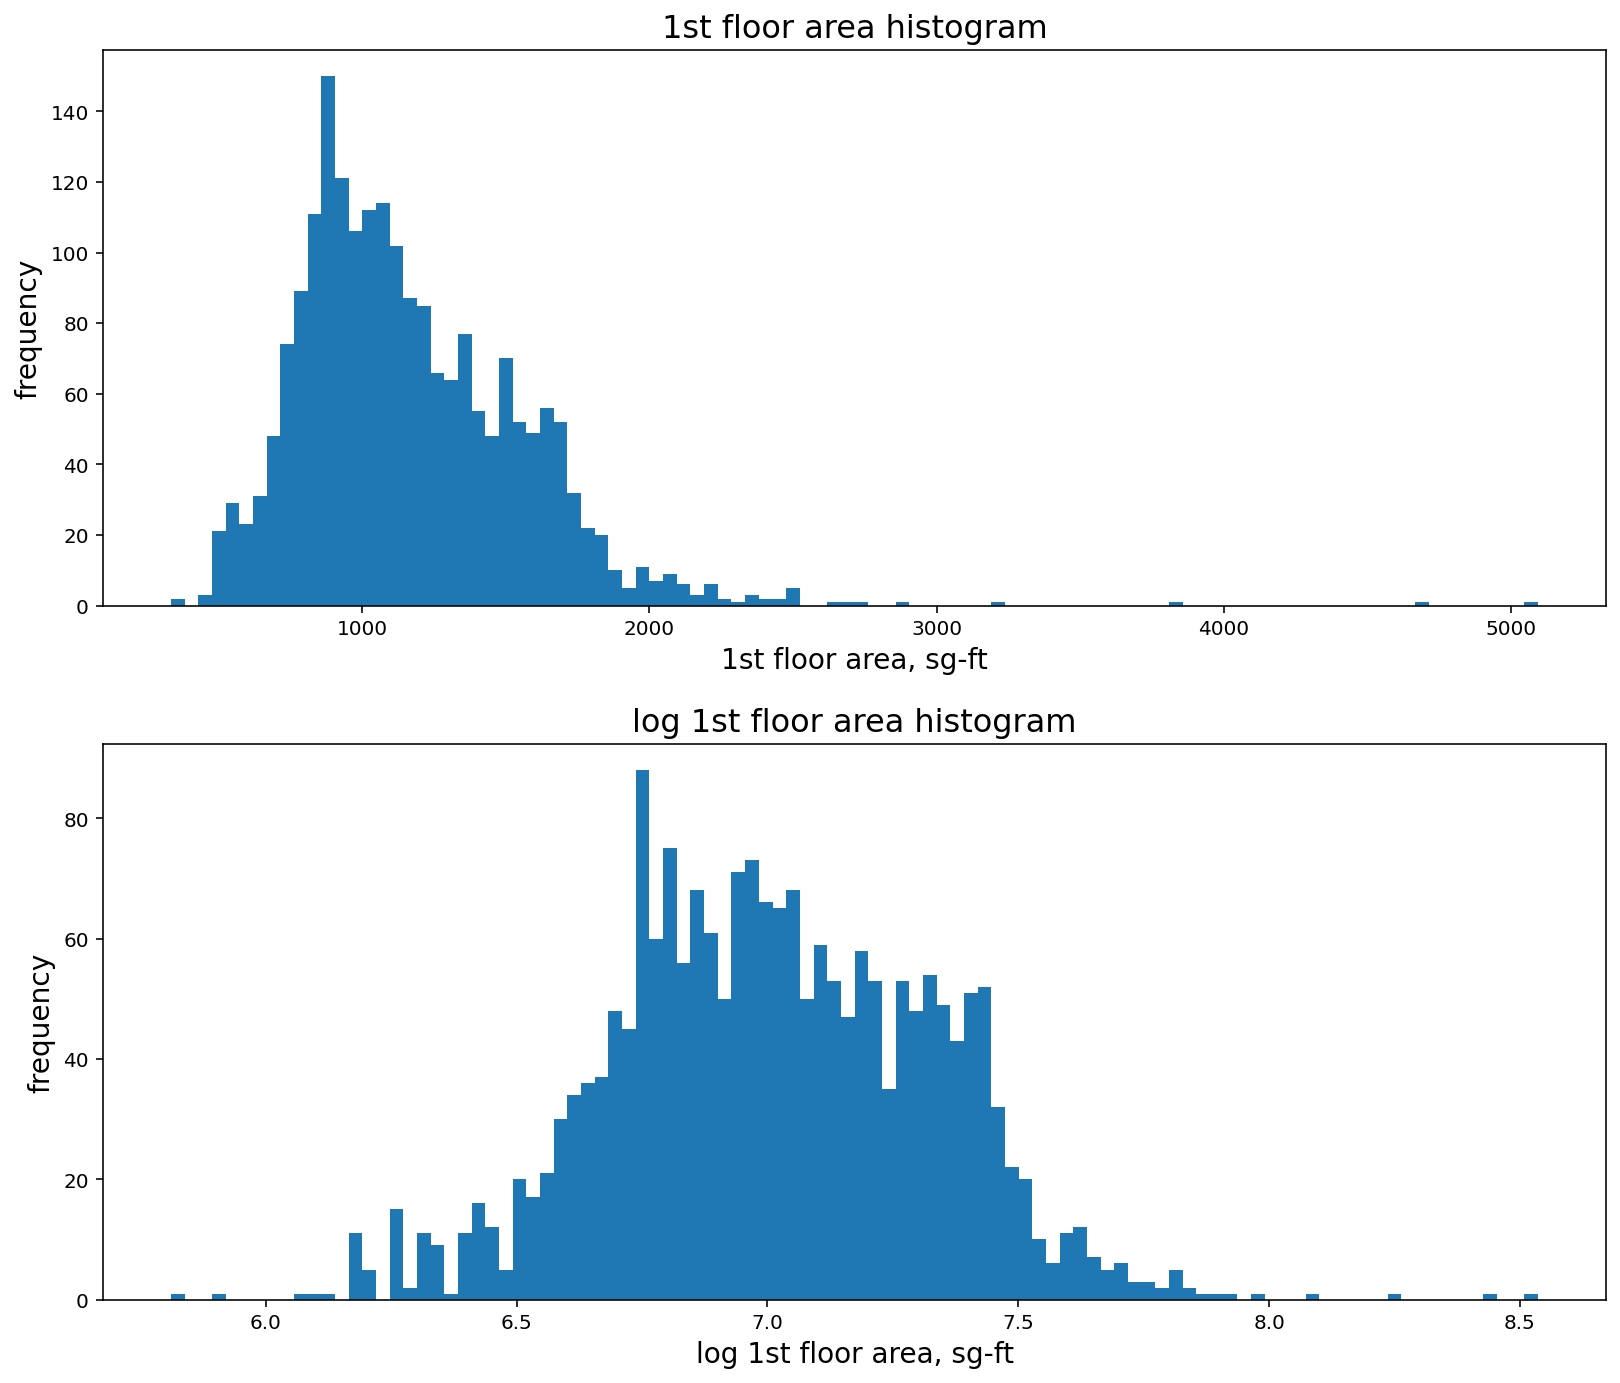

In [35]:
# plotting similar area and log area plots for 1st floor area feature
fig, ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)
ax[0].hist(ames2['1st_flr_sf'], bins=100)
ax[0].set_ylabel('frequency', fontsize=14)
ax[0].set_xlabel('1st floor area, sg-ft', fontsize=14)
ax[0].set_title('1st floor area histogram', fontsize=16)
fig.tight_layout(pad=3)
ax[1].hist(np.log(ames2['1st_flr_sf']), bins=100)
ax[1].set_ylabel('frequency', fontsize=14)
ax[1].set_xlabel('log 1st floor area, sg-ft', fontsize=14)
ax[1].set_title('log 1st floor area histogram', fontsize=16)
plt.show()

In [36]:
# similar principle, will apply log function to gr_liv_area, lot_area and 1st_flr_sf
# as the log function improves the normality of the data
# omitted basement and garage as these columns have 0 values which are problematic for applying log
ames2['log_gr_liv_area'] = np.log(ames2['gr_liv_area'])
ames2['log_lot_area'] = np.log(ames2['lot_area'])
ames2['log_1st_flr_sf'] = np.log(ames2['1st_flr_sf'])

Comments:\
Taking a logarithmic function for sale price improved the normality of the distribution of the datapoints, as the tail is significantly smaller.\
Likewise, we are taking a similar approach to generate a logarithmic function for some of the areas too.\
Some, however are omitted due to the presence of 0 values.

### Feature engineering - outliers handling

In [37]:
# remove outliers for sale price, beyond 3 sigma
log_sp_mean = ames2['log_saleprice'].mean()
log_sp_std = ames2['log_saleprice'].std()
upper = log_sp_mean+3*log_sp_std
lower = log_sp_mean-3*log_sp_std
outliers = ames2[(ames2['log_saleprice']>upper) | (ames2['log_saleprice']<lower)]
ames3 = ames2.drop(index = outliers.index)

In [38]:
# confirm that the outliers have been removed
ames3[outliers].sum()[ames3[outliers].sum()>0]

Series([], dtype: object)

Comments:\
It is known that regression fitting is susceptible skewing by outliers, which could result in an overfitted model when the model tries to include the outliers influence in the fitting process.\
Therefore, outliers as defined as beyond the 3 sigmas (standard deviation) will be removed.

### Feature engineering - One-Hot-Encoding for categorical data

In [39]:
# demonstrating one-hot-encoding for categorical columns
ames4 = ames1.copy()
ames4 = pd.get_dummies(columns = ['neighborhood'], data=ames4, drop_first=False)
ames4.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0


In [40]:
# generating a list of the dummified columns to be used in the feature selection
# i will copy this printed list of columns into the codebox to select these columns for the X variable
nbh_dum = pd.get_dummies(ames1[['neighborhood']])
nbh_dum.columns

Index(['neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale',
       'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
       'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
       'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR',
       'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker'],
      dtype='object')

Comments:\
Demonstating OHE getting dummy variables despite decision not to include these feature in my model, consistent with the philosophy of minimizing model complexity where possible and still making sure model performance is not severely compromised.

### Last check before modelling 

In [41]:
# verify indeed no more null values
ames3.isnull().sum()[ames3.isnull().sum()>0]

Series([], dtype: int64)

In [42]:
# reset index after dropping datas
ames3.reset_index(inplace=True, drop=True)

In [43]:
# check tail to confirm index has been reset 
ames3.tail()

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,...,location,house,garage,basement,age_at_sale,remod_age_at_sale,log_saleprice,log_gr_liv_area,log_lot_area,log_1st_flr_sf
2032,2,2,79.0,11449,2,HLS,1,2,2,2,...,7,7,12.0,11.0,1,1,12.607366,7.454720,9.345658,7.454720
2033,1,2,0.0,12342,2,Lvl,1,1,2,2,...,6,6,3.0,8.0,69,59,11.320554,6.758095,9.420763,6.758095
2034,1,2,57.0,7558,1,Bnk,1,2,2,2,...,7,6,2.0,8.0,81,59,12.083905,7.556428,8.930362,7.066467
2035,2,2,80.0,10400,1,Lvl,2,1,2,2,...,7,6,6.0,8.0,53,53,11.877569,7.090077,9.249561,7.090077
2036,2,2,60.0,7500,1,Lvl,1,2,2,2,...,7,8,12.0,8.0,11,11,12.149502,7.497762,8.922658,6.935370


### Export cleaned data for use

In [44]:
ames3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ms_subclass        2037 non-null   int64  
 1   ms_zoning          2037 non-null   int64  
 2   lot_frontage       2037 non-null   float64
 3   lot_area           2037 non-null   int64  
 4   lot_shape          2037 non-null   int64  
 5   land_contour       2037 non-null   object 
 6   lot_config         2037 non-null   int64  
 7   neighborhood       2037 non-null   int64  
 8   condition_1        2037 non-null   int64  
 9   bldg_type          2037 non-null   int64  
 10  house_style        2037 non-null   int64  
 11  overall_qual       2037 non-null   int64  
 12  overall_cond       2037 non-null   int64  
 13  year_built         2037 non-null   int64  
 14  year_remod/add     2037 non-null   int64  
 15  roof_style         2037 non-null   object 
 16  exterior_1st       2037 

In [45]:
# export the cleaned dataset
ames3.to_csv('../datasets/ames3_data.csv', index=False)

#### Data Dictionary

|Feature|Type|Dataset|Description|
|:-|:-:|:-|:-|
|	ms_subclass	|	int	|	ames3	|	 The building class	|
|	ms_zoning	|	int	|	ames3	|	 Identifies the general zoning classification of the sale.	|
|	lot_frontage	|	float	|	ames3	|	 Linear feet of street connected to property	|
|	lot_area	|	int	|	ames3	|	 Lot size in square feet	|
|	lot_shape	|	int	|	ames3	|	 General shape of property	|
|	land_contour	|	object	|	ames3	|	 Flatness of the property	|
|	lot_config	|	int	|	ames3	|	 Lot configuration	|
|	neighborhood	|	int	|	ames3	|	 Physical locations within Ames city limits	|
|	condition_1	|	int	|	ames3	|	 Proximity to main road or railroad	|
|	bldg_type	|	int	|	ames3	|	 Type of dwelling	|
|	house_style	|	int	|	ames3	|	 Style of dwelling	|
|	overall_qual	|	int	|	ames3	|	 Overall material and finish quality	|
|	overall_cond	|	int	|	ames3	|	 Overall condition rating	|
|	year_built	|	int	|	ames3	|	 Original construction date	|
|	year_remod/add	|	int	|	ames3	|	 Remodel date (same as construction date if no remodeling or additions)	|
|	roof_style	|	object	|	ames3	|	 Type of roof	|
|	exterior_1st	|	int	|	ames3	|	 Exterior covering on house	|
|	exterior_2nd	|	object	|	ames3	|	 Exterior covering on house (if more than one material)	|
|	mas_vnr_type	|	object	|	ames3	|	 Masonry veneer type	|
|	mas_vnr_area	|	float	|	ames3	|	 Masonry veneer area in square feet	|
|	exter_qual	|	int	|	ames3	|	 Exterior material quality	|
|	exter_cond	|	int	|	ames3	|	 Present condition of the material on the exterior	|
|	foundation	|	object	|	ames3	|	 Type of foundation	|
|	bsmt_qual	|	float	|	ames3	|	 Height of the basement	|
|	bsmt_cond	|	float	|	ames3	|	 General condition of the basement	|
|	bsmt_exposure	|	int	|	ames3	|	 Walkout or garden level basement walls	|
|	bsmtfin_type_1	|	int	|	ames3	|	 Quality of basement finished area	|
|	bsmtfin_sf_1	|	float	|	ames3	|	 Type 1 finished square feet	|
|	bsmtfin_type_2	|	object	|	ames3	|	 Quality of second finished area (if present)	|
|	bsmtfin_sf_2	|	float	|	ames3	|	 Type 2 finished square feet	|
|	bsmt_unf_sf	|	float	|	ames3	|	 Unfinished square feet of basement area	|
|	total_bsmt_sf	|	float	|	ames3	|	 Total square feet of basement area	|
|	heating_qc	|	int	|	ames3	|	 Heating quality and condition	|
|	1st_flr_sf	|	int	|	ames3	|	 First Floor square feet	|
|	2nd_flr_sf	|	int	|	ames3	|	 Second floor square feet	|
|	low_qual_fin_sf	|	int	|	ames3	|	 Low quality finished square feet (all floors)	|
|	gr_liv_area	|	int	|	ames3	|	 Above grade (ground) living area square feet	|
|	bsmt_full_bath	|	float	|	ames3	|	 Basement full bathrooms	|
|	bsmt_half_bath	|	float	|	ames3	|	 Basement half bathrooms	|
|	full_bath	|	int	|	ames3	|	 Full bathrooms above grade	|
|	half_bath	|	int	|	ames3	|	 Half baths above grade	|
|	bedroom_abvgr	|	int	|	ames3	|	 Number of bedrooms above basement level	|
|	kitchen_abvgr	|	int	|	ames3	|	 Number of kitchens	|
|	kitchen_qual	|	int	|	ames3	|	 Kitchen quality	|
|	totrms_abvgrd	|	int	|	ames3	|	 Total rooms above grade (does not include bathrooms)	|
|	fireplaces	|	int	|	ames3	|	 Number of fireplaces	|
|	fireplace_qu	|	float	|	ames3	|	 Fireplace quality	|
|	garage_type	|	int	|	ames3	|	 Garage location	|
|	garage_yr_blt	|	float	|	ames3	|	 Year garage was built	|
|	garage_finish	|	int	|	ames3	|	 Interior finish of the garage	|
|	garage_cars	|	float	|	ames3	|	 Size of garage in car capacity	|
|	garage_area	|	float	|	ames3	|	 Size of garage in square feet	|
|	garage_qual	|	float	|	ames3	|	 Garage quality	|
|	wood_deck_sf	|	int	|	ames3	|	 Wood deck area in square feet	|
|	open_porch_sf	|	int	|	ames3	|	 Open porch area in square feet	|
|	enclosed_porch	|	int	|	ames3	|	 Enclosed porch area in square feet	|
|	3ssn_porch	|	int	|	ames3	|	 Three season porch area in square feet	|
|	screen_porch	|	int	|	ames3	|	 Screen porch area in square feet	|
|	pool_area	|	int	|	ames3	|	 Pool area in square feet	|
|	fence	|	object	|	ames3	|	 Fence quality	|
|	misc_val	|	int	|	ames3	|	 $Value of miscellaneous feature	|
|	mo_sold	|	int	|	ames3	|	 Month sold	|
|	yr_sold	|	int	|	ames3	|	 Year sold	|
|	sale_type	|	object	|	ames3	|	 Type of sale	|
|	saleprice	|	int	|	ames3	|	Sale price of the house, also the target variable	|
|	location	|	int	|	ames3	|	Location attributes for each house, refer to note 1	|
|	house	|	int	|	ames3	|	House attributes for each house, refer to note 2	|
|	garage	|	float	|	ames3	|	Garage attributes for each house, refer to note 3	|
|	basement	|	float	|	ames3	|	Basement attributes for each house, refer to note 4	|
|	age_at_sale	|	int	|	ames3	|	Age of the house at time of sale	|
|	remod_age_at_sale	|	int	|	ames3	|	Remodelled age of the house at time of sale	|
|	log_saleprice	|	float	|	ames3	|	Natural logarithm of the sale price	|
|	log_gr_liv_area	|	float	|	ames3	|	Natural logarithm of the above grade living area	|
|	log_lot_area	|	float	|	ames3	|	Natural logarithm of the lot size	|
|	log_1st_flr_sf	|	float	|	ames3	|	Natural logarithm of the 1st floor area	|
 
Notes:\
note 1 - location attributes are an amalgamation of ms_zoning, log_config, neighborhood and condition 1. It describes the physical geography and location of the house.\
note 2 - house attributes are an amalgamation of ms_subclass, bldg_type, house_style and exterior_1st. It describes some key physical attributes of the house.\
note 3 - garage attriutes are an amalgamation of garage_type, garage_finish and garage_qual. It describes some key physical attributes of the garage.\
note 4 - basement attributes are an amalgamation of bsmt_qual, bsmt_cond, bsmt_exposure and bsmtfin_type. It describes some key physical attributes of the basement.
